Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Basic statistics for headline lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


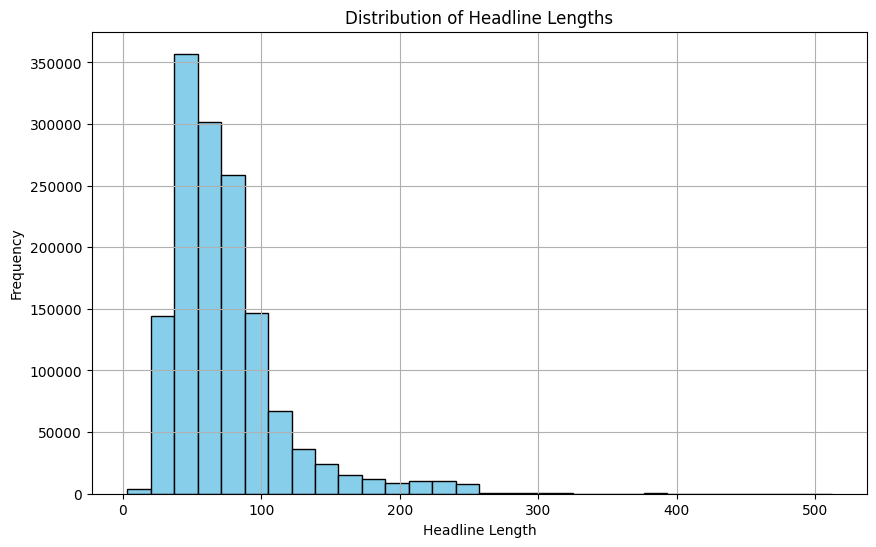

Number of articles per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


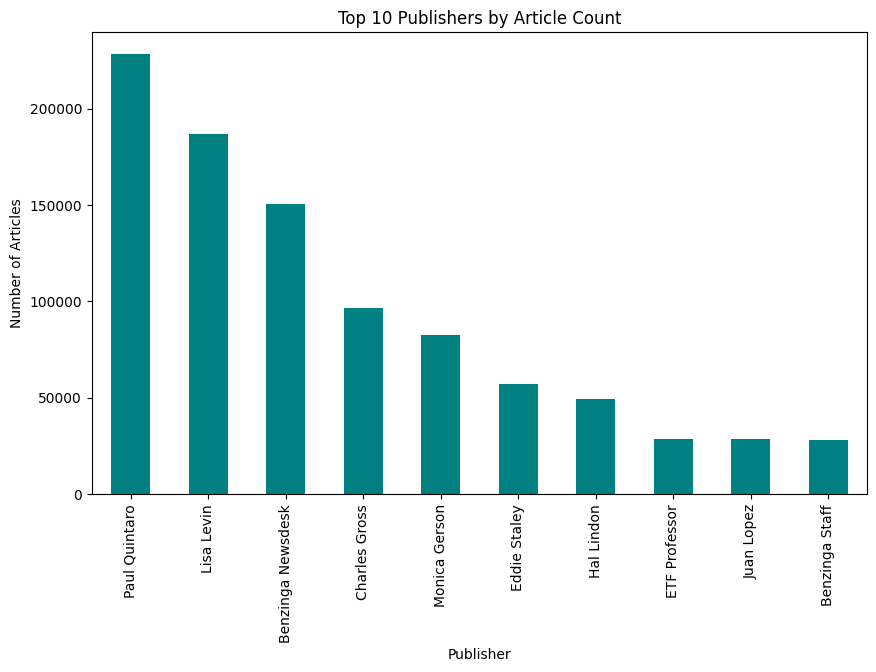

C:\Users\MMM\AppData\Local\Temp\ipykernel_236\809932730.py:56: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['publication_date'].dt.to_period('M')


Number of articles published per month:
year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


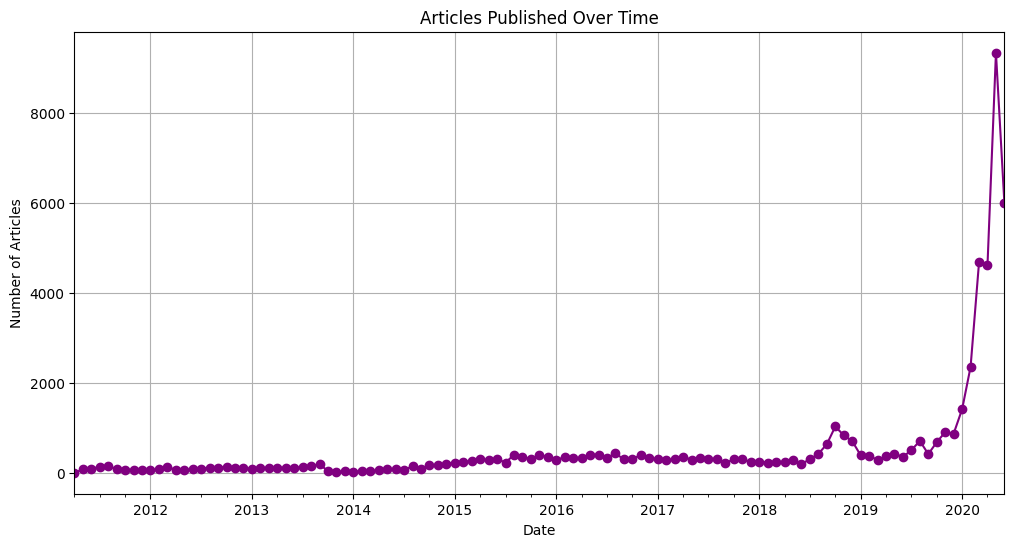

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw analyst ratings data
file_path = 'raw_analyst_ratings.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head()

# Check column names and data types to make sure we know what we're working with
print(data.info())

# Print the column names to inspect them
print(data.columns)

# Assuming your dataset has columns like 'headline', 'publisher', 'publication_date'
# If the column names are different, adjust accordingly.

# 1. Calculate basic statistics for headline lengths (textual lengths)
data['headline_length'] = data['headline'].apply(len)
print("Basic statistics for headline lengths:")
print(data['headline_length'].describe())

# Plot distribution of headline lengths
plt.figure(figsize=(10,6))
data['headline_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# 2. Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print("Number of articles per publisher:")
print(publisher_counts)

# Plot top 10 publishers by number of articles
plt.figure(figsize=(10,6))
publisher_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

# 3. Analyze publication dates to observe trends over time
# Convert publication_date to datetime if it's not already in datetime format
data['publication_date'] = pd.to_datetime(data['date'], errors='coerce')


# Drop rows with invalid dates
data = data.dropna(subset=['publication_date'])

# Extract year and month for trend analysis
data['year_month'] = data['publication_date'].dt.to_period('M')

# Count articles per month
articles_per_month = data['year_month'].value_counts().sort_index()

print("Number of articles published per month:")
print(articles_per_month)

# Plot publication trends over time
plt.figure(figsize=(12,6))
articles_per_month.plot(kind='line', color='purple', marker='o')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [6]:
%pip install textblob


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install gensim


  Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl.metadata (8.2 kB)
  Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
Using cached gensim-4.3.3-cp310-cp310-win_amd64.whl (24.0 MB)
Using cached scipy-1.13.1-cp310-cp310-win_amd64.whl (46.2 MB)
Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('raw_analyst_ratings.csv')

# Preview the first few rows to verify
print(df.head())



   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [15]:
# Check the column names
print(df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [16]:
# Assuming the column is named 'headline' or similar
df['headline'] = df['headline'].astype(str)

# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Print the summary statistics
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df['sentiment'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

print(df[['headline', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                                    headline  \
date                                                                           
2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday   
2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...   

                           sentiment  
date                                  
2020-06-05 10:30:54-04:00      0.000  
2020-06-03 10:45:20-04:00      0.000  
2020-05-26 04:30:07-04:00      0.000  
2020-05-22 12:45:06-04:00      0.000  
2020-05-22 11:38:59-04:00      0.296  


In [6]:
# Print all column names in the DataFrame
print(df.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'stock', 'sentiment',
       'headline_length'],
      dtype='object')


In [13]:
df.shape

(1407328, 8)

In [14]:
df.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,headline_length,publication_date
date,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,39,NaT
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,42,NaT
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,29,NaT
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,44,NaT
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,87,NaT


In [15]:
df.isnull().sum()

Unnamed: 0                0
headline                  0
url                       0
publisher                 0
stock                     0
sentiment                 0
headline_length           0
publication_date    1407327
dtype: int64

In [16]:
df.describe()

,Unnamed: 0,sentiment,headline_length,publication_date
count,1.407328e+06,1.407328e+06,1.407328e+06,1
mean,7.072454e+05,6.650410e-02,7.312051e+01,2019-07-29 00:00:00
min,0.000000e+00,-9.578000e-01,3.000000e+00,2019-07-29 00:00:00
25%,3.538128e+05,0.000000e+00,4.700000e+01,2019-07-29 00:00:00
50%,7.072395e+05,0.000000e+00,6.400000e+01,2019-07-29 00:00:00
75%,1.060710e+06,2.023000e-01,8.700000e+01,2019-07-29 00:00:00
max,1.413848e+06,9.741000e-01,5.120000e+02,2019-07-29 00:00:00
std,4.081009e+05,2.714077e-01,4.073531e+01,NaN


In [17]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)  # Replace 'headline' with the actual column name if different

# Obtain descriptive statistics for headline lengths
#print(df['headline_length'].describe())

df['headline_length']

date
2020-06-05 10:30:54-04:00    39
2020-06-03 10:45:20-04:00    42
2020-05-26 04:30:07-04:00    29
2020-05-22 12:45:06-04:00    44
2020-05-22 11:38:59-04:00    87
                             ..
2011-08-29 00:00:00          38
2011-06-22 00:00:00          52
2011-06-21 00:00:00          56
2011-06-21 00:00:00          54
2011-05-12 00:00:00          81
Name: headline_length, Length: 1407328, dtype: int64

In [19]:
%pip install  seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


C:\Users\MMM\AppData\Local\Temp\ipykernel_6828\1658566786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette="viridis")


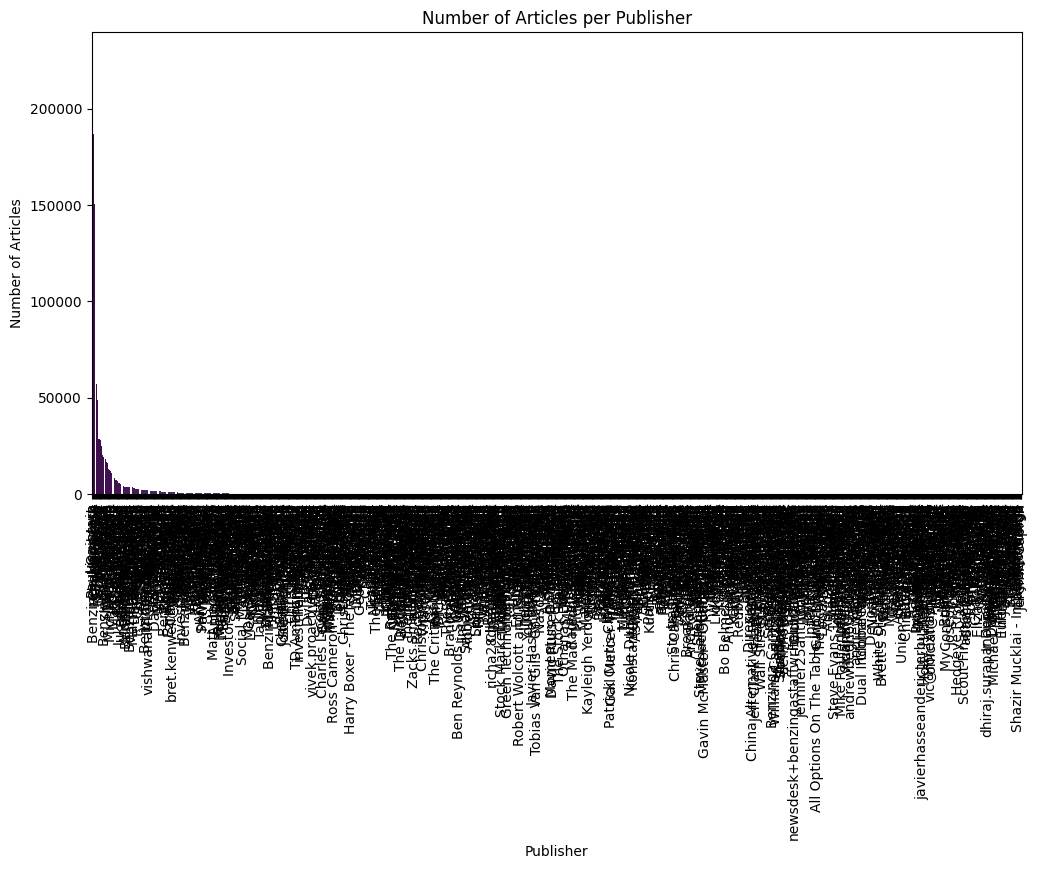

In [20]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()  # Replace 'publisher' with the actual column name if different

# Display the counts of articles per publisher
print(publisher_counts)

#Plot the number of articles per publisher
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [26]:
import pandas as pd

# Load the data
df = pd.read_csv('raw_analyst_ratings.csv')  # Update with your file path

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Check the conversion
print(df['date'].dtype)
print(df['date'].head())

datetime64[ns, UTC]
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]


C:\Users\MMM\AppData\Local\Temp\ipykernel_6828\1492524341.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="muted")


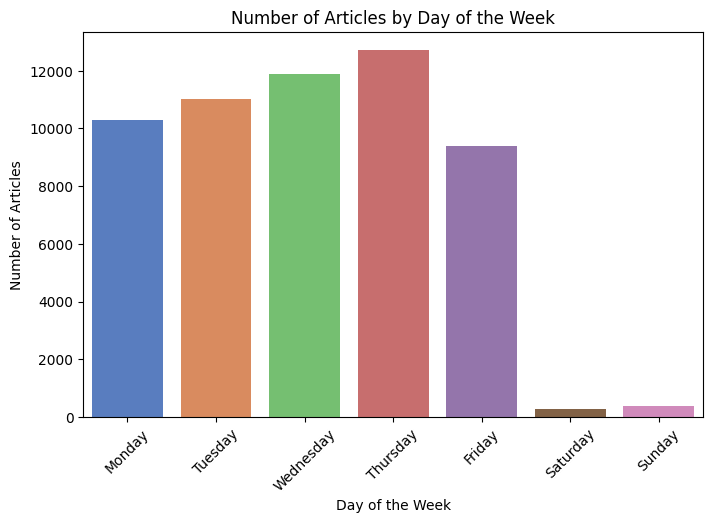

In [27]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Calculate the number of articles per day of the week
day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the number of articles by day of the week
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="muted")
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()

In [29]:
df.to_csv('processed_analyst_ratings.csv', index=False)  # Save as CSV

In [31]:
# Load and preprocess data
df = pd.read_csv('raw_analyst_ratings.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.to_csv('preprocessed_data.csv')  # Save the cleaned data for use in other notebooks